<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/InterpolationHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function my_lagrange(x, y, X), where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Then graph this with the the original x,y points in black and the computed points in red.



In [51]:
import matplotlib.pyplot as plt
import numpy as np

def my_lagrange(x, y, X):
  sum = 0
  product = 0
  n = len(x)
  Y = np.zeros(len(X), dtype=float)
  for elt in range(0,len(X)) :
    for i in range(0,n):
     P=0
     product = 1
     for j in range(0,n) :
      if (x[i]!=x[j]):
       product= product * ((X[elt]-x[j])/(x[i]-x[j]))
     sum = sum + product * y[i]
    Y[elt] = sum
    sum = 0

  xgraph = np.linspace(x[0], x[len(x)-1], 100)
  ygraph = [0]*100
  sum = 0
  product = 0
  n = len(x)
  for elt in range(0,len(xgraph)) :
    for i in range(0,n):
     P=0
     product = 1
     for j in range(0,n) :
      if (x[i]!=x[j]):
       product= product * ((xgraph[elt]-x[j])/(x[i]-x[j]))
     P = product
     sum = sum + product * y[i]
    ygraph[elt] = sum
    sum = 0

  plt.plot(xgraph,ygraph)
  plt.scatter(x,y,color='black',label = 'original points')
  plt.scatter(X,Y,color='red', label = 'data points')
  return Y




[ 9.         12.5        12.71875    12.41796875]


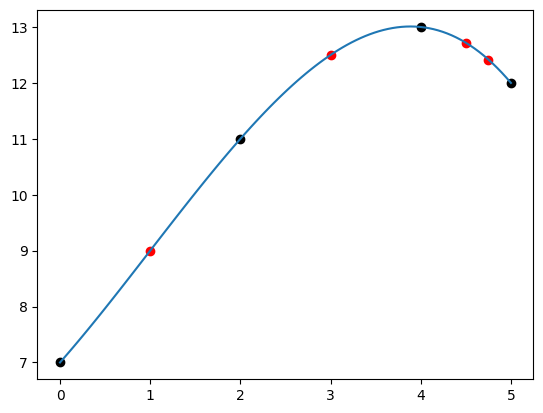

In [14]:
x = [0,2,4,5]
y = [7, 11,13,12]
X= [1,3,4.5,4.75]

print(my_lagrange(x,y,X))

[39.88094658  7.82498293 13.39199857 12.87883264 19.3        20.2       ]


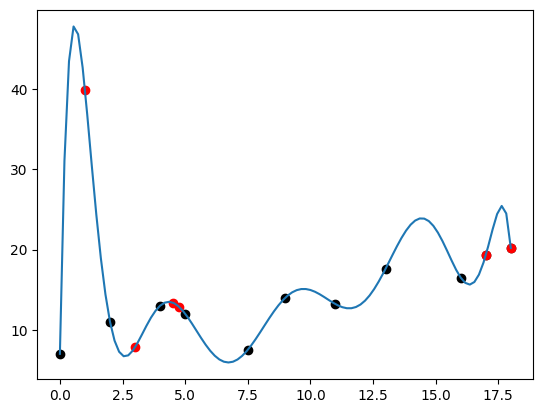

In [52]:
x = [0,2,4,5,7.5,9,11,13,16,17,18]
y = [7, 11,13,12,7.5,14,13.2,17.6,16.5,19.3,20.2]
X= [1,3,4.5,4.75,17,18]

print(my_lagrange(x,y,X))

Write a function my_Newton(x, y, X), where the output Y is the Newton's polynomial interpolation of the data points contained in x and y computed at X. Then graph this with the the original x,y points in black and the computed points in red.

In [44]:
def find_coef(x,y,i,j):
    if (j-i ==1):
      a = (y[j]-y[i])/(x[j]-x[i])
      return a
    a = (find_coef(x,y,i+1,j)-find_coef(x,y,i,j-1))/(x[j]-x[i])
    return a

In [49]:
def my_newton(x,y,X) :
  coef = np.zeros(len(x), dtype=float)
  for j in range(0,len(coef)) :
    if j == 0 :
      coef[j] = y[j]
    else :
      coef[j] = find_coef(x,y,0,j)




  Y = np.zeros(len(X), dtype=float)
  sum = 0
  product = 0
  n = len(x)
  for elt in range(0,len(X)) :
    for i in range(0,n):
     P=0
     product = coef[i]
     if i>0:
      for j in range(0,i) :
        product= product * (X[elt]-x[j])
     sum = sum + product
    Y[elt] = sum
    sum = 0

  xgraph = np.linspace(x[0], x[len(x)-1], 100)
  ygraph = [0]*100
  sum = 0
  product = 0
  n = len(x)
  for elt in range(0,len(xgraph)) :
    for i in range(0,n):
     P=0
     product = coef[i]
     if i>0:
      for j in range(0,i) :
        product= product * (xgraph[elt]-x[j])
     sum = sum + product
    ygraph[elt] = sum
    sum = 0


  plt.plot(xgraph,ygraph)
  plt.scatter(x,y,color='black',label = 'original points')
  plt.scatter(X,Y,color='red', label = 'data points')
  return Y


[ 9.         12.5        12.71875    12.41796875]


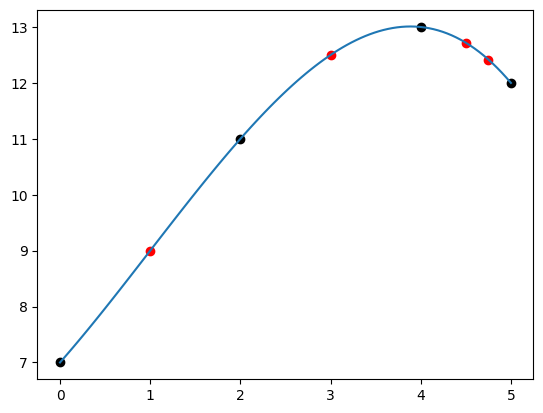

In [50]:
x = [0,2,4,5]
y = [7, 11,13,12]
X= [1,3,4.5,4.75]

print(my_newton(x,y,X))

[39.88094658  7.82498293 13.39199857 12.87883264 19.3        20.2       ]


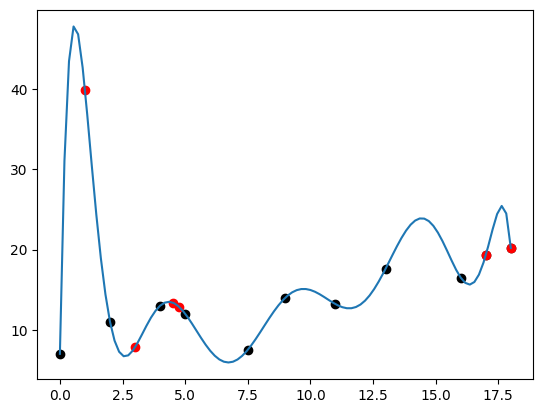

In [53]:
x = [0,2,4,5,7.5,9,11,13,16,17,18]
y = [7, 11,13,12,7.5,14,13.2,17.6,16.5,19.3,20.2]
X= [1,3,4.5,4.75,17,18]

print(my_newton(x,y,X))